Mean Absolute Error: 1.1019470242246483
Mean Squared Error: 2.1167422217120873


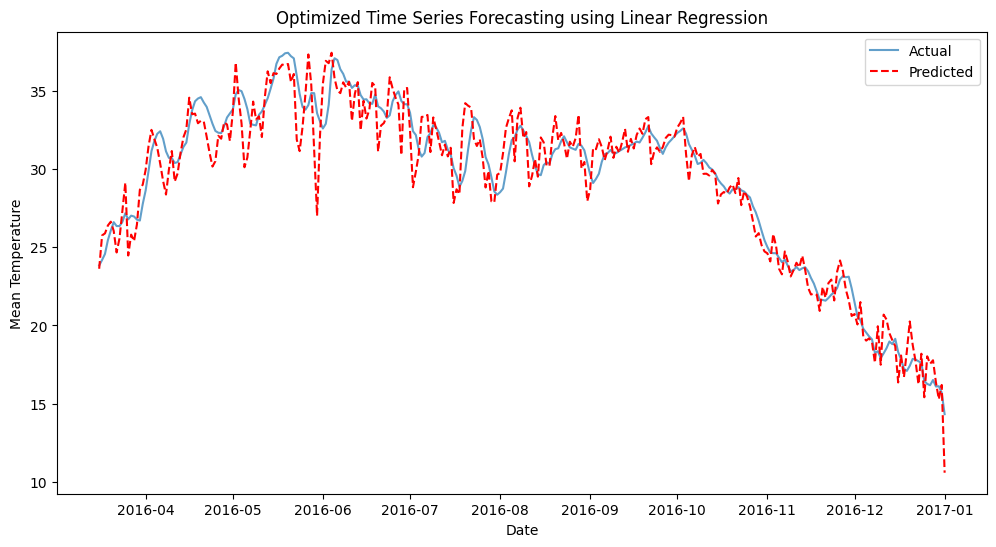

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load time series dataset
df = pd.read_csv("/content/DailyDelhiClimateTrain.csv", parse_dates=["date"], index_col="date")

# Differencing to remove trend
df['meantemp_diff'] = df['meantemp'].diff().fillna(0)

# Rolling mean smoothing
df['meantemp_smooth'] = df['meantemp'].rolling(window=5).mean().fillna(df['meantemp'])

# Creating time-based features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Time'] = np.arange(len(df))

# Adding lag features
for lag in range(1, 5):
    df[f'meantemp_lag{lag}'] = df['meantemp_diff'].shift(lag)

df.dropna(inplace=True)

# Selecting features based on correlation
corr_matrix = df.corr()
top_features = corr_matrix['meantemp_smooth'].abs().sort_values(ascending=False).index[1:7]
X = df[top_features]
y = df['meantemp_smooth']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual', alpha=0.7)
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted', linestyle='dashed', color='red')
plt.title("Optimized Time Series Forecasting using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()
